In [1]:
from numpy import arange
from matplotlib import pyplot
from numpy import asarray
from numpy.random import rand
from numpy.random import seed

Define the objective function to be f(x) = x^2. Next define its derivative.

In [37]:
def objective(x):
    return x**2

In [38]:
# derivative of objective function
def derivative(x):
    return 2*x

In [39]:
# define range for input
r_min, r_max = -1.0, 1.0
# sample input range uniformly at 0.1 increments
inputs = arange(r_min, r_max+0.1, 0.1)
# compute targets
results = objective(inputs)

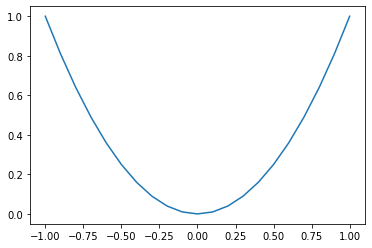

In [40]:
# create a line plot of input vs result
pyplot.plot(inputs, results)
# show the plot
pyplot.show()

Next we need to define our Vanilla Gradient Descent. We will be storing all our scores along the way so that we can get a neat little plot at the end.

In [41]:
def gradient_descent(objective, derivative, bounds, n_iter, step_size):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# take a step
		solution = solution - step_size * gradient
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

>0 f([0.74724774]) = 0.55838
>1 f([0.59779819]) = 0.35736
>2 f([0.47823856]) = 0.22871
>3 f([0.38259084]) = 0.14638
>4 f([0.30607268]) = 0.09368
>5 f([0.24485814]) = 0.05996
>6 f([0.19588651]) = 0.03837
>7 f([0.15670921]) = 0.02456
>8 f([0.12536737]) = 0.01572
>9 f([0.10029389]) = 0.01006
>10 f([0.08023512]) = 0.00644
>11 f([0.06418809]) = 0.00412
>12 f([0.05135047]) = 0.00264
>13 f([0.04108038]) = 0.00169
>14 f([0.0328643]) = 0.00108
>15 f([0.02629144]) = 0.00069
>16 f([0.02103315]) = 0.00044
>17 f([0.01682652]) = 0.00028
>18 f([0.01346122]) = 0.00018
>19 f([0.01076897]) = 0.00012
>20 f([0.00861518]) = 0.00007
>21 f([0.00689214]) = 0.00005
>22 f([0.00551372]) = 0.00003
>23 f([0.00441097]) = 0.00002
>24 f([0.00352878]) = 0.00001
>25 f([0.00282302]) = 0.00001
>26 f([0.00225842]) = 0.00001
>27 f([0.00180673]) = 0.00000
>28 f([0.00144539]) = 0.00000
>29 f([0.00115631]) = 0.00000


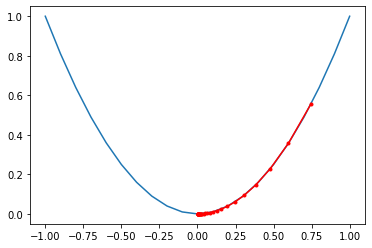

In [42]:
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# perform the gradient descent search
solutions, scores = gradient_descent(objective, derivative, bounds, n_iter, step_size)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()

In [22]:
def gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum):
	# track all solutions
	solutions, scores = list(), list()
	# generate an initial point
	solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
	# keep track of the change
	change = 0.0
	# run the gradient descent
	for i in range(n_iter):
		# calculate gradient
		gradient = derivative(solution)
		# calculate update
		new_change = momentum * change - step_size * gradient
		# take a step
		solution = solution + new_change
		# save the change
		change = new_change
		# evaluate candidate point
		solution_eval = objective(solution)
		# store solution
		solutions.append(solution)
		scores.append(solution_eval)
		# report progress
		print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
	return [solutions, scores]

>0 f([0.74724774]) = 0.55838
>1 f([0.54175461]) = 0.29350
>2 f([0.37175575]) = 0.13820
>3 f([0.24640494]) = 0.06072
>4 f([0.15951871]) = 0.02545
>5 f([0.1015491]) = 0.01031
>6 f([0.0638484]) = 0.00408
>7 f([0.03976851]) = 0.00158
>8 f([0.02459084]) = 0.00060
>9 f([0.01511937]) = 0.00023
>10 f([0.00925406]) = 0.00009
>11 f([0.00564365]) = 0.00003
>12 f([0.0034318]) = 0.00001
>13 f([0.00208188]) = 0.00000
>14 f([0.00126053]) = 0.00000
>15 f([0.00076202]) = 0.00000
>16 f([0.00046006]) = 0.00000
>17 f([0.00027746]) = 0.00000
>18 f([0.00016719]) = 0.00000
>19 f([0.00010067]) = 0.00000
>20 f([6.05804744e-05]) = 0.00000
>21 f([3.64373635e-05]) = 0.00000
>22 f([2.19069576e-05]) = 0.00000
>23 f([1.31664443e-05]) = 0.00000
>24 f([7.91100141e-06]) = 0.00000
>25 f([4.75216828e-06]) = 0.00000
>26 f([2.85408468e-06]) = 0.00000
>27 f([1.71384267e-06]) = 0.00000
>28 f([1.02900153e-06]) = 0.00000
>29 f([6.17748881e-07]) = 0.00000


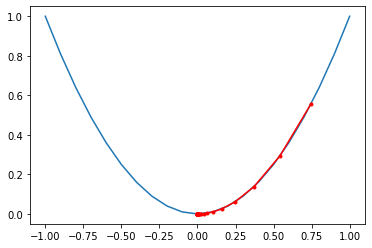

In [23]:
# seed the pseudo random number generator
seed(4)
# define range for input
bounds = asarray([[-1.0, 1.0]])
# define the total iterations
n_iter = 30
# define the step size
step_size = 0.1
# define momentum
momentum = 0.3
# perform the gradient descent search with momentum
solutions, scores = gradient_descent_with_momentum(objective, derivative, bounds, n_iter, step_size, momentum)
# sample input range uniformly at 0.1 increments
inputs = arange(bounds[0,0], bounds[0,1]+0.1, 0.1)
# compute targets
results = objective(inputs)
# create a line plot of input vs result
pyplot.plot(inputs, results)
# plot the solutions found
pyplot.plot(solutions, scores, '.-', color='red')
# show the plot
pyplot.show()